In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime as dt


# To Disable Warnings
import warnings
warnings.filterwarnings(action = "ignore")

In [2]:
online_data = pd.read_csv("OnlineRetailV3.csv")

In [3]:
online_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2017-12-1,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2017-12-1,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2017-12-1,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2017-12-1,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2017-12-1,1.25,13085.0,United Kingdom


This dataframe contains 8 variables that correspond to:

1. __InvoiceNo__: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
2. __StockCode__ : Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
3. __Description__: Product (item) name. Nominal.
4. __Quantity__: The quantities of each product (item) per transaction. Numeric.
5. __InvoiceDate__: Invice Date and time. Numeric, the day and time when each transaction was generated.
6. __Price__: Unit price. Numeric, Product price per unit in sterling.
7. __CustomerID__: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
8. __Country__: Country name. Nominal, the name of the country where each customer resides.

In [ ]:

#online_data.shape ---  1067371 , 8
#online_data["Invoice"].nunique()

In [ ]:
#online_data.info()

In [ ]:
#online_data.isnull().sum()

In [4]:
online_data1 = online_data.copy()

In [5]:
online_data11 = online_data1.dropna(axis =0, subset = ["Description", "Customer ID"])

In [6]:
online_data11.shape 

(824364, 8)

In [8]:
online_data11.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [9]:
#online_data11.duplicated().any() - True
online_data11.duplicated().sum()

26481

In [7]:
online12 = online_data11.drop_duplicates()

In [8]:
online12.shape
#online12.duplicated().any() - False

(797883, 8)

In [9]:
online12["Customer ID"] = online12["Customer ID"].astype(np.int64)

In [ ]:
#online12['Invoice'].nunique()
#online12['Customer ID'].nunique()

In [28]:
online12["Quantity"] = np.abs(online12["Quantity"])
online12["Total Spend"] = online12["Price"] * online12["Quantity"]

#### EDA

Start with invoice. which is a number given to a perticular transaction. In data set info it is showing invoice is object type.it has some canceled transation.

In [29]:
online13 = online12.copy()
online13["cancel_order"] = online13["Invoice"].apply(lambda x: int("C" in x))
online13["cancel_order"].value_counts()

0    779493
1     18390
Name: cancel_order, dtype: int64

In [11]:
online13[online13["cancel_order"] == 1]["Customer ID"].nunique()

2572

now we have __StockCode__ which is 5 digit no given to particular product. in some of stock code also have characters


In [12]:
online13["StockCode"].nunique()

4646

In [13]:
alpha_codes = online13[online13['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]
alpha_codes.count()

Invoice         3662
StockCode       3662
Description     3662
Quantity        3662
InvoiceDate     3662
Price           3662
Customer ID     3662
Country         3662
cancel_order    3662
dtype: int64

In [10]:
alpha_codes["StockCode"].value_counts()

POST            1983
M               1085
C2               254
D                170
ADJUST            61
BANK CHARGES      37
PADS              19
DOT               16
CRUK              16
TEST001           15
ADJUST2            3
SP1002             2
TEST002            1
Name: StockCode, dtype: int64

In [14]:
num_codes =online13[online13["StockCode"].str.endswith(('0','1','2','3','4','5','6','7','8','9'))]

In [12]:
num_codes.count()

Invoice         706358
StockCode       706358
Description     706358
Quantity        706358
InvoiceDate     706358
Price           706358
Customer ID     706358
Country         706358
cancel_order    706358
dtype: int64

In [15]:
mixed =online13[~online13["StockCode"].str.endswith(('0','1','2','3','4','5','6','7','8','9'))]

In [16]:
alnum_codes = mixed[~mixed['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]

In [34]:
alnum_codes.count()

Invoice         88138
StockCode       88138
Description     88138
Quantity        88138
InvoiceDate     88138
Price           88138
Customer ID     88138
Country         88138
Total Spend     88138
cancel_order    88138
dtype: int64

#### Description

In [89]:
from wordcloud import WordCloud ,STOPWORDS

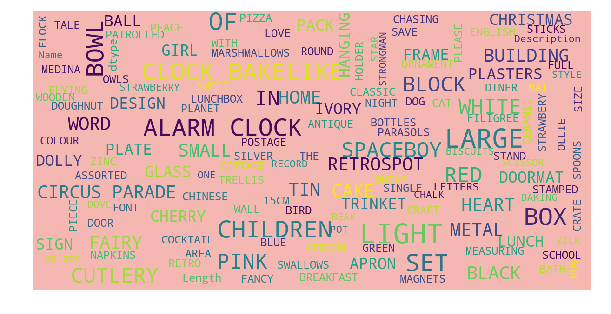

In [94]:
stopwords = set(STOPWORDS)
def mywordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = "#F5B7B1",
        stopwords = stopwords,
        max_words = 300,
        max_font_size = 20,
        scale = 3, 
        random_state = 1    
    ).generate(str(data))
    
    fig = plt.figure(1, figsize = (10,15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top=2.3)
        
    plt.imshow(wordcloud)
    plt.show()
    
    
mywordcloud(online13["Description"].dropna())    

#### Quantity

In [17]:
online13["Quantity"].min()  # 1
online13["Quantity"].max()  #80995

80995

####  InvoiceDate

In [31]:
online13['InvoiceDate'] = pd.to_datetime(online13['InvoiceDate'])
online14 = online13.copy()
online14["Month"] = online14["InvoiceDate"].dt.month
#Month-st = online13['InvoiceDate'].dt.strftime('%b')
online14["Month"].value_counts()

11    124313
10     99647
9      75369
12     75012
3      60108
6      59023
5      57852
7      54613
8      54021
4      50417
1      43792
2      43716
Name: Month, dtype: int64

In [32]:
online14["year"] = online14["InvoiceDate"].dt.year
online14["year"].value_counts()

2018    391358
2019    375250
2017     31275
Name: year, dtype: int64

In [33]:
online14.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Spend,cancel_order,Month,year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2017-12-01,6.95,13085,United Kingdom,83.4,0,12,2017
1,489434,79323P,PINK CHERRY LIGHTS,12,2017-12-01,6.75,13085,United Kingdom,81.0,0,12,2017
2,489434,79323W,WHITE CHERRY LIGHTS,12,2017-12-01,6.75,13085,United Kingdom,81.0,0,12,2017
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2017-12-01,2.10,13085,United Kingdom,100.8,0,12,2017
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2017-12-01,1.25,13085,United Kingdom,30.0,0,12,2017


####  Price

In [20]:
price_0 = online14[online14["Price"] <= 0]
price_0.count()

Invoice         70
StockCode       70
Description     70
Quantity        70
InvoiceDate     70
Price           70
Customer ID     70
Country         70
cancel_order    70
Month           70
year            70
dtype: int64

In [34]:
online15 = online14.copy()
online15.drop(online15[online15["Price"]>= 11000]. index, axis=0, inplace=True)
online15.drop(online15[online15["Price"]<= 0]. index, axis=0, inplace=True)
online15.shape

(797811, 12)

In [22]:
price_low = online14[(online14["Price"] >= 1) & (online14["Price"] <= 100) ]
price_med = online14[(online14["Price"] >= 100) & (online14["Price"] <= 1000) ]
price_high = online14[(online14["Price"] >= 1000) & (online14["Price"] <= 10000) ]
price_highest = online14[(online14["Price"] >= 10000) & (online14["Price"] <= 40000) ]

In [23]:
price_table  = pd.DataFrame([{"Price_0" : price_0["StockCode"].nunique(),
                              "Price_low" : price_low["StockCode"].nunique(),
                              "Price_med" : price_med["StockCode"].nunique(),
                              "Price_high" : price_high["StockCode"].nunique(),
                              "Price_highest" : price_highest["StockCode"].nunique()}], index = ["Items"])
price_table

,Price_0,Price_high,Price_highest,Price_low,Price_med
Items,61,5,1,3896,18


####  Customer ID

In [24]:
#online14["Customer ID"].nunique() --- 5942
id_count = online14["Customer ID"].value_counts()
Top10_customer = id_count.head(10)
Top10_customer

17841    12638
14911    11444
12748     6662
14606     6500
14096     5128
15311     4579
14156     4118
14646     3890
13089     3391
16549     3098
Name: Customer ID, dtype: int64

In [25]:
(id_count[id_count] == 1).count()

5942

#### Country

In [34]:
#online14["Country"].nunique() --- 41
online14["Country"].value_counts()

United Kingdom          716113
Germany                  17339
EIRE                     16014
France                   13897
Netherlands               5137
Spain                     3754
Belgium                   3110
Switzerland               3058
Portugal                  2414
Australia                 1890
Channel Islands           1646
Italy                     1507
Sweden                    1343
Norway                    1308
Cyprus                    1157
Finland                   1049
Austria                    938
Denmark                    797
Greece                     663
Japan                      565
USA                        535
Poland                     527
Unspecified                521
United Arab Emirates       386
Singapore                  346
Israel                     321
Malta                      299
Canada                     228
Iceland                    222
Lithuania                  154
RSA                        123
Brazil                      94
Thailand

In [26]:
# online14["Total Spend"].max() --- 168469.6
# online14["Total Spend"].min() ---- 0.0
online14.groupby("Country")["Total Spend"].sum().sort_values(ascending = False)
online14.groupby("Country")["Total Spend"].mean().sort_values(ascending = False)

Country
Netherlands             108.963496
Singapore               108.312023
Denmark                  91.219310
Australia                91.070106
Japan                    82.098619
Sweden                   71.191452
Norway                   59.013066
EIRE                     41.190915
Thailand                 40.401842
Lebanon                  37.641778
Malta                    36.809231
Spain                    33.471375
Israel                   33.154766
Switzerland              33.140768
Lithuania                31.770649
Czech Republic           31.525333
Channel Islands          29.262746
Greece                   28.954585
Finland                  28.919571
France                   27.163536
Austria                  25.637974
Germany                  25.265601
Portugal                 25.035058
United Arab Emirates     24.180492
Bahrain                  22.955424
Italy                    22.536324
Cyprus                   22.184391
Iceland                  22.169054
Belgium     

####  cancel_orders

In [31]:
online14["cancel_order"].value_counts()

0    779493
1     18390
Name: cancel_order, dtype: int64

In [27]:
c_stock = online14[(online14["cancel_order"] == 1)]["StockCode"].value_counts().sort_values(ascending = False).head(10)
c_des = online14[(online14["cancel_order"] == 1)]["Description"].value_counts().sort_values(ascending = False).head(10)

## EDA by Visualization

### 1. which top 10 product sold most?

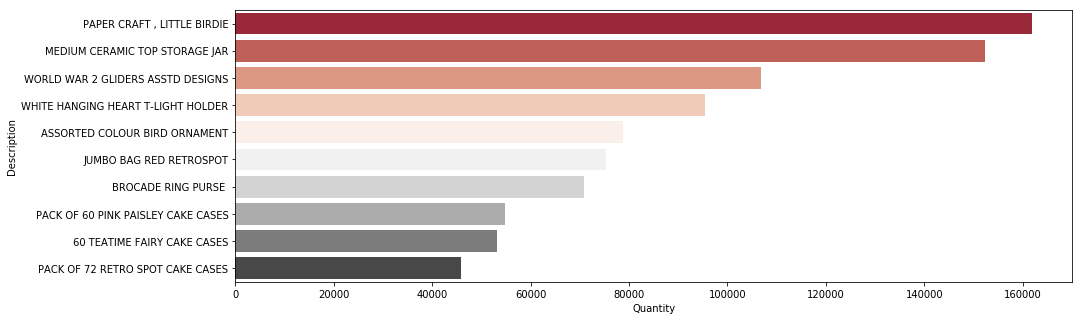

In [49]:
des = online14.groupby(by = "Description", as_index = False ).agg('sum').sort_values(by = 'Quantity', ascending = False)
top10_des = des[0:10]

figure = plt.figure(figsize = [15, 5])
sns.barplot(data = top10_des , x= "Quantity" , y = "Description" , palette = "RdGy")

### 2. Which product is Costly?

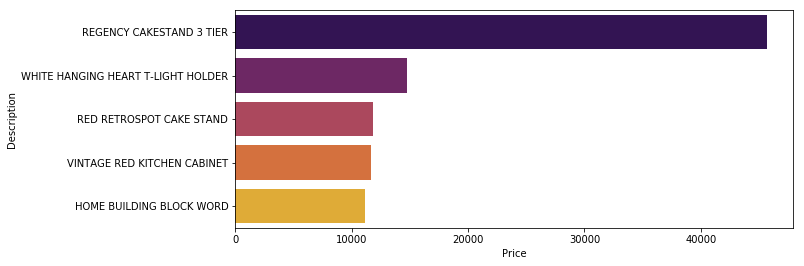

In [45]:
des1 = online14.groupby(by = "Description", as_index = False ).agg('sum').sort_values(by = 'Price', ascending = False)
top10_des1 = des1[0:10]
top10_des1
costly_product = top10_des1.iloc[[2,3,7,8,9]]
figure = plt.figure(figsize = [10, 4])

sns.barplot(data = costly_product , x= "Price" , y = "Description" , palette = "inferno")

### 3.  How many % product cancelled? 

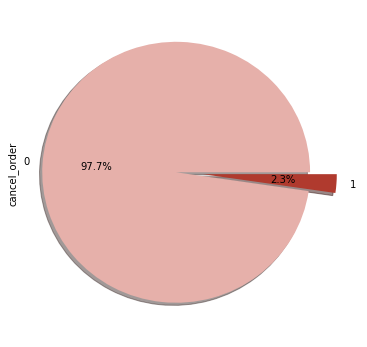

In [62]:
figure = plt.figure(figsize = [6, 6])
colors = ["#E6B0AA","#B03A2E",]
online14["cancel_order"].value_counts().plot.pie(explode=[0.1,0.1],colors= colors,autopct='%1.1f%%',shadow=True)

### 4.  Product which are cancelled most.

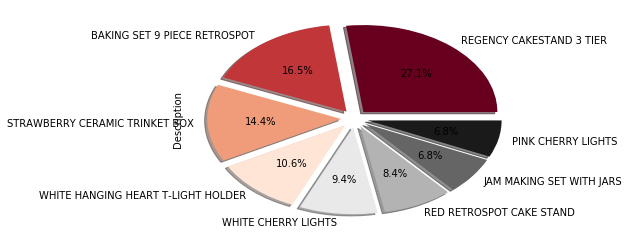

In [47]:
c_des = online14[(online14["cancel_order"] == 1)]["Description"].value_counts().sort_values(ascending = False).head(11)
space = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
c_des.iloc[[1,2,3,6,7,8,9,10]].plot.pie(explode = space, autopct="%3.1f%%",shadow = True, figsize = (6,4),cmap = "RdGy")

### 5.  Countries from where max customer belongs.

Text(0.5,1,'Donut Plot showing the customers from top 5 countries')

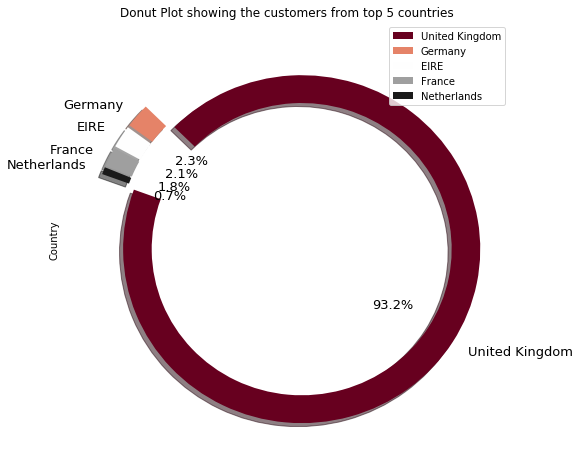

In [44]:
space = [0.1,0.1,0.1,0.1,0.1]
online14['Country'].value_counts().head().plot(kind='pie',explode = space, fontsize=13, autopct='%3.1f%%', wedgeprops=dict(width=0.16), 
                                       shadow=True, startangle=160, legend=True, figsize=(8,8), cmap='RdGy')

plt.ylabel('Country')

plt.title('Donut Plot showing the customers from top 5 countries')

### 6.  Average Total Spand from different Countries.

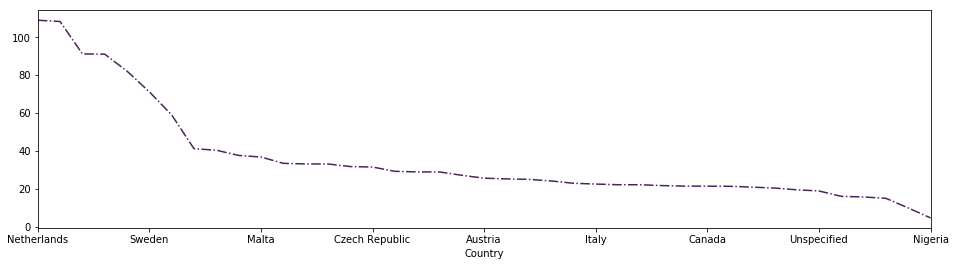

In [86]:
online14.groupby("Country")["Total Spend"].mean().sort_values(ascending = False).plot(kind= "line", figsize = (16,4),color = '#4A235A',linestyle ='-.')


### 7.  In which Month Total Spend is maximum in different Years?

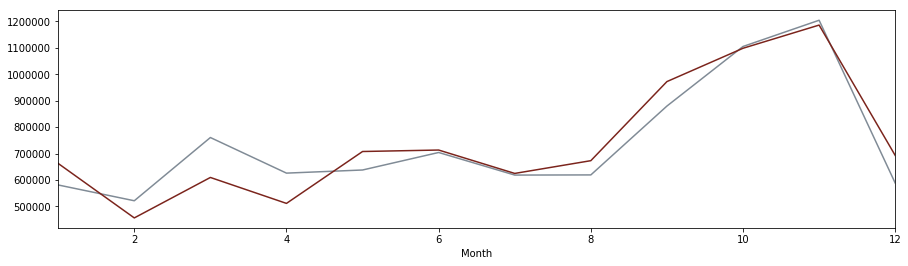

In [40]:
figure = plt.figure(figsize = [15, 4])
online14[(online14["year"] == 2017)].groupby("Month")["Total Spend"].sum().plot(kind = "line" )
online14[(online14["year"] == 2018)].groupby("Month")["Total Spend"].sum().plot(kind = "line", color = "#808B96"  )
online14[(online14["year"] == 2019)].groupby("Month")["Total Spend"].sum().plot(kind = "line", color = "#7B241C" )


### 8. Spread of  Price Distribution 

In [30]:
online15 = online14.copy()
online15.drop(online15[online15["Price"]>= 11000]. index, axis=0, inplace=True)
online15.shape

(797881, 12)

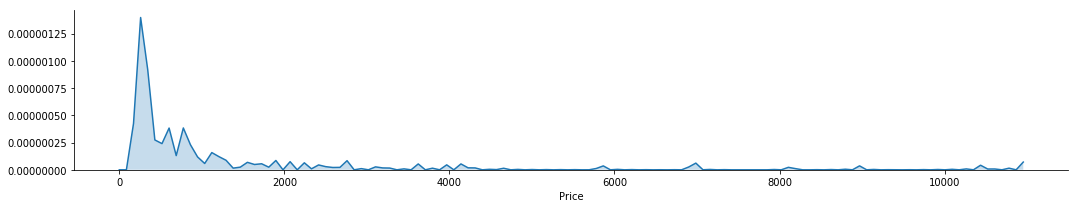

In [31]:
online15 = online14.copy()
online15.drop(online15[online15["Price"]>= 11000]. index, axis=0, inplace=True)
#online15.shape   ---- 79881,12
price = sns.FacetGrid(online15, aspect=5)

price.map(sns.kdeplot,'Price',shade=True)

To see spread clearly divide the __Price__ in different Ranges. So it would be easy to compare.
1. __Price_low__ : In it price lies between __0 to 100__.
2. __Price_med__ : In this price lies between __100 to 1000__.  
3. __Price_high__ : In this price lies between __1000 to max__

Text(0.5,1,'Price_range 1000-10000')

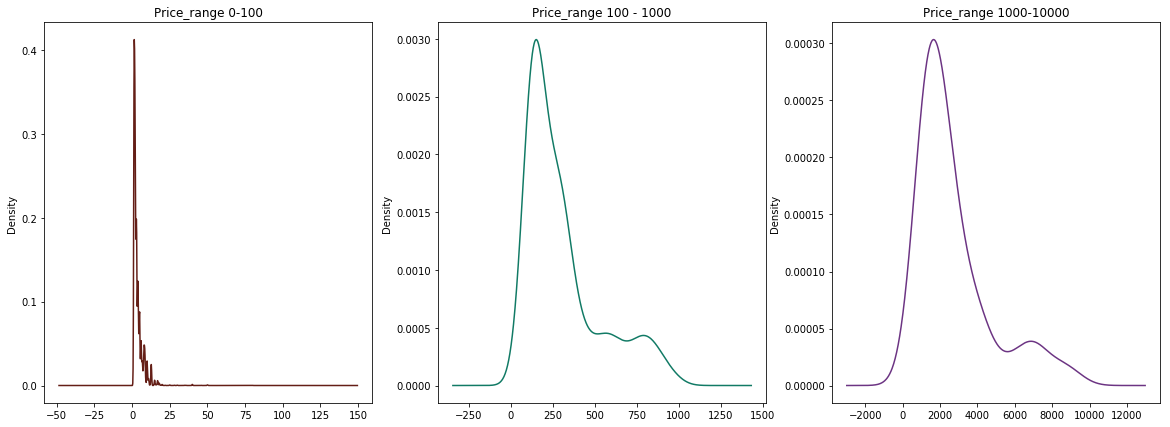

In [39]:
f,ax = plt.subplots(1,3,figsize=(20,7))
price_low['Price'].plot(kind='kde',ax = ax[0],  color='#641E16')
price_med['Price'].plot(kind='kde',ax= ax[1], color='#117A65' )
price_high['Price'].plot(kind='kde', ax = ax[2], color='#6C3483')

ax[0].set_title('Price_range 0-100')
ax[1].set_title('Price_range 100 - 1000')
ax[2].set_title('Price_range 1000-10000')

- From first graph we can say that the product having price **~&pound; 0-100 pounds**., has most product costs **~&pound; 0-25 pounds**.
- From 2nd one we come to know that the product having price **~&pound; 100- 10000 pounds**., has costs around __250 pounds__  and have good range to __500__.
- 3rd has peak at 2000 and have good range till 5000, and have spread around **~&pound;10000 pounds**.


### 9.  Sale by days 

In [36]:
dt_spend = online15.groupby(by = 'InvoiceDate', as_index = False).agg('sum') 

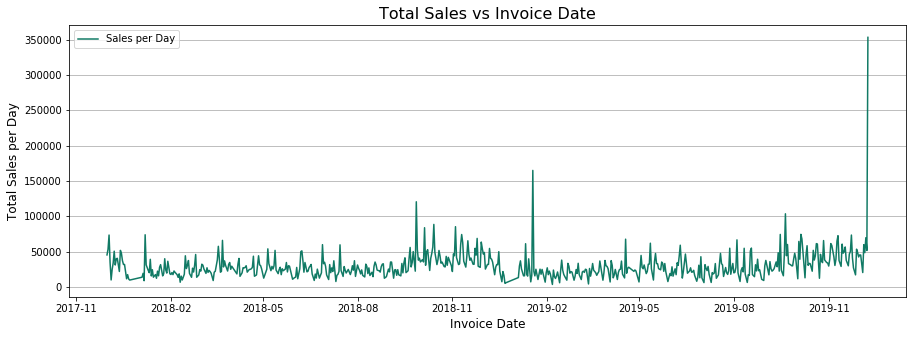

In [42]:
figure = plt.figure(figsize = [15, 5])
sns.lineplot(x = 'InvoiceDate', y = 'Total Spend', data = dt_spend, color = '#117A65')

plt.xlabel('Invoice Date', size = 12)
plt.ylabel('Total Sales per Day', size = 12)
plt.legend(labels = ['Sales per Day'], loc = 'upper left', frameon = True )
plt.title('Total Sales vs Invoice Date', size = 16)
plt.grid(b = True, axis = 'y')
plt.show()

- **Sales** around the month of **January, 2019** was pretty **high** (**~&pound;165000 pounds**).

- **Sales** around the month of **December, 2019** was pretty **high** (**~&pound;360000 pounds**).

In [36]:
online15.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Spend,cancel_order,Month,year,LogQuantity,LogTotalSpend
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2017-12-01,6.95,13085,United Kingdom,83.4,0,12,2017,2.564949,4.435567
1,489434,79323P,PINK CHERRY LIGHTS,12,2017-12-01,6.75,13085,United Kingdom,81.0,0,12,2017,2.564949,4.406719
2,489434,79323W,WHITE CHERRY LIGHTS,12,2017-12-01,6.75,13085,United Kingdom,81.0,0,12,2017,2.564949,4.406719
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2017-12-01,2.10,13085,United Kingdom,100.8,0,12,2017,3.891820,4.623010
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2017-12-01,1.25,13085,United Kingdom,30.0,0,12,2017,3.218876,3.433987


In [41]:
online15.shape

(797811, 14)

### Customer Segmentation Using K-Means

In [35]:
online15['LogQuantity'] = np.log1p(online15['Quantity'])
online15['LogTotalSpend'] = np.log1p(online15['Total Spend'])

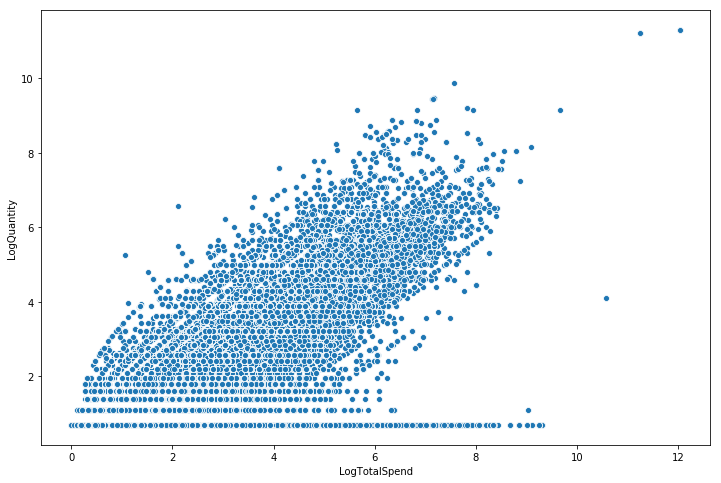

In [40]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = online15, x ='LogTotalSpend', y='LogQuantity')

In [43]:
from sklearn.cluster import KMeans

In [44]:
X1 = online15[['LogQuantity' , 'LogTotalSpend']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                          random_state= 111 ) )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)


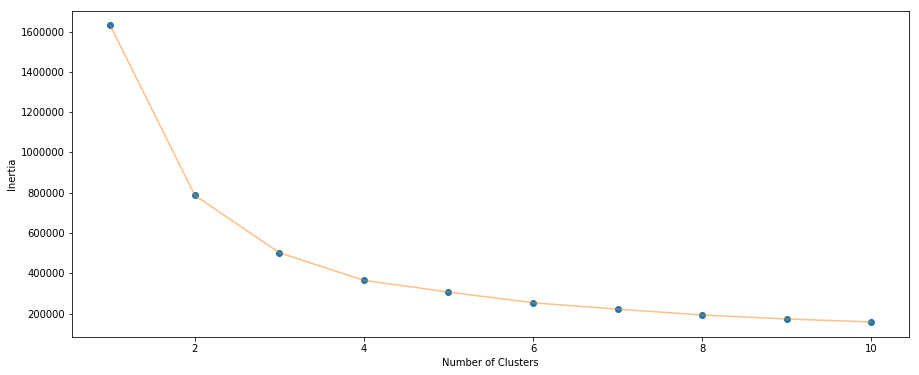

In [45]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
number_of_clusters = range(1,20)
kmeans = [KMeans(n_clusters=i,max_iter=1000,random_state=42) for i in number_of_clusters]
score = [-1*kmeans[i].fit(review_data_std).score(review_data_std) for i in range(len(kmeans))]
pl.plot((number_of_clusters),score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [51]:
k_means_test = KMeans(n_clusters=4,max_iter= 200 ,random_state=42)

In [52]:
-1*k_means_test.fit(X1).score(X1)

364752.8989113883

In [54]:
online15['labels'] = k_means_test.labels_

In [75]:
centers = k_means_test.cluster_centers_

In [76]:
centers

array([[1.5250447 , 2.75426254],
       [0.96471325, 1.3471161 ],
       [4.06837451, 4.6421482 ],
       [2.71486791, 2.84571914]])

In [55]:
online15.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Spend,cancel_order,Month,year,LogQuantity,LogTotalSpend,labels
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2017-12-01,6.95,13085,United Kingdom,83.4,0,12,2017,2.564949,4.435567,2
1,489434,79323P,PINK CHERRY LIGHTS,12,2017-12-01,6.75,13085,United Kingdom,81.0,0,12,2017,2.564949,4.406719,2
2,489434,79323W,WHITE CHERRY LIGHTS,12,2017-12-01,6.75,13085,United Kingdom,81.0,0,12,2017,2.564949,4.406719,2
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2017-12-01,2.10,13085,United Kingdom,100.8,0,12,2017,3.891820,4.623010,2
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2017-12-01,1.25,13085,United Kingdom,30.0,0,12,2017,3.218876,3.433987,3


In [57]:
size_of_each_cluster = online15.groupby('labels').size().reset_index()

In [58]:
size_of_each_cluster

,labels,0
0,0,241472
1,1,243109
2,2,51205
3,3,262025


In [59]:
size_of_each_cluster.columns = ['labels','number_of_points']
size_of_each_cluster['percentage'] = size_of_each_cluster['number_of_points']/np.sum(size_of_each_cluster['number_of_points'])

print(size_of_each_cluster)

   labels  number_of_points  percentage
0       0            241472    0.302668
1       1            243109    0.304720
2       2             51205    0.064182
3       3            262025    0.328430


#### Visualising Clusters

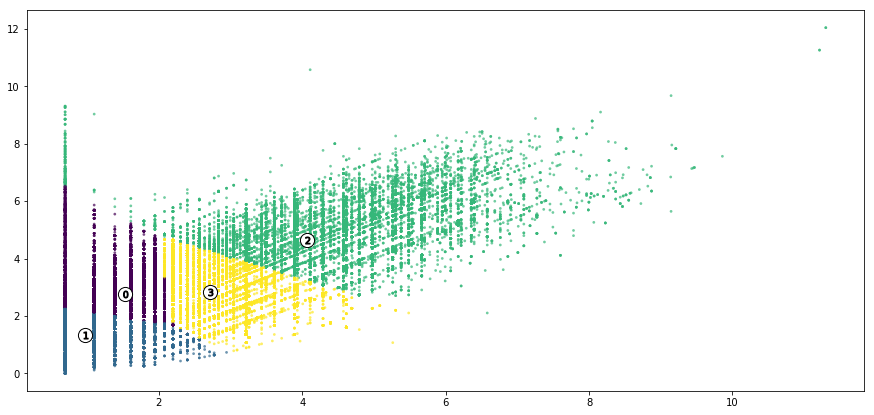

In [83]:
fig, ax1 = plt.subplots(1, 1, figsize = [15, 7])
ax1.scatter(x = online15['LogQuantity'], y = online15['LogTotalSpend'], marker='.', s = 30, lw = 0, alpha = 0.7, c = online15['labels'])
ax1.scatter(x = centers[:, 0], y = centers[:, 1], marker = 'o', c = "white", alpha = 1, s = 200, edgecolor = 'k')
for i, c in enumerate(centers):
    ax1.scatter(x = c[0], y = c[1], marker = '$%d$' % i, alpha = 1, s = 50, edgecolor = 'k')
plt.xlabel(xlabel = 'Feature Space 1 (LogQuantity)', size = 14)
plt.ylabel(ylabel = 'Feature Space 2 (LogTotalSpend)', size = 14)
plt.title(label = 'Visualization of Clustered Data', size = 16)
#plt.show()

**Observation:**

- We can see that **clusters 1 and 4 are more profitable** **because** they seem to **order more quantity** as well as have **high purchase** values.

- For the **cluster 2**, both the **quantity and purchase** value is **less**.

- For the **cluster 0**, though the **quantity** ordered is **less**, the **purchase** value is **greater** than the cluster 3.

- On the other hand, the **cluster 3** has **higher quantity** ordered **than cluster 0** but the **purchase** value is **lesser**.